In [136]:
import pandas as pd 
import json
import plotly.express as px
import plotly.graph_objects as go

In [88]:
classes = ["big-data-and-cloud-computing","block-chain","data-analyst","data-scientist","deep-learning","machine-learning","natural-language-processing","neural-networks","reinforcement-learning"]
wants = ['title', 'company_name', 'location', 'via', 'description']
title,company_name,location,via,description,types = [],[],[],[],[],[]
for i in classes:
    x = 0
    while x < 100:
        file_path = "2023-04-14-job-search-location-USA/"+ i + "-" + str(x) + ".json"
        try:
            with open(file_path) as json_file:
                data = json.load(json_file)
            for ob in range(len(data["jobs_results"])):
                title.append(data["jobs_results"][ob]["title"])
                company_name.append(data["jobs_results"][ob]["company_name"])
                location.append(data["jobs_results"][ob]["location"])
                via.append(data["jobs_results"][ob]["via"])
                description.append(data["jobs_results"][ob]["description"])
                types.append(i)
        except:
            break
        x += 1



In [183]:
df_USA = pd.DataFrame({"title":title, "company_name":company_name, "location":location, "via":via, "description":description, "type":types})
df_USA["location"] = df_USA["location"].str.split(", ").str[1]
df_USA["via"] = df_USA["via"].str.split(" ").str[1]
df_USA


,title,company_name,location,via,description,type
0,"Sales Engineer, Data Analytics, Google Cloud",Google,UT,Google,When leading companies choose Google Cloud it'...,big-data-and-cloud-computing
1,John Deere (Cloud & Big Data Engineer)_2022.06,Full Stack Resources,IL,Recruiterflow,CLOUD & BIG DATA ENGINEER\n• Must have at leas...,big-data-and-cloud-computing
2,"Cloud Consultant, Big Data and Analytics, Goog...",Google,VA,Karkidi,Minimum qualifications:\n• Bachelor’s degree i...,big-data-and-cloud-computing
3,"Lead Software Engineer, Cloud and Big Data",JPMorgan Chase,DE,LocalJobs.com,"As a Lead Software Engineer, Cloud and Big Dat...",big-data-and-cloud-computing
4,"Data Architect, Big Data, Cloud Technologies",Elevance Health,GA,ZipRecruiter,"Position Title:\nData Architect, Big Data, Clo...",big-data-and-cloud-computing
...,...,...,...,...,...,...
445,Research Intern - Machine Learning,Microsoft,WA,Microsoft,Research Internships at Microsoft provide a dy...,reinforcement-learning
446,Senior Machine Learning and Perception Engineer,Teradyne,MA,Teradyne,Organization & Role\n\nMobile Industrial Robot...,reinforcement-learning
447,Machine Learning Internship,Got It AI,CA,AngelList,About Got It AI\n\nGot It AI has transformed t...,reinforcement-learning
448,Hewlett Packard Labs - Machine Learning Resear...,HPE1US,CA,HPE,Hewlett Packard Labs - Machine Learning Resear...,reinforcement-learning


In [111]:

dft = df_USA["location"].value_counts()
dft.columns = ["location", "count"]
dft =pd.DataFrame(dft)
dft["location"] = dft.index
dft["location"] = dft["location"].apply(lambda x: x[:2])
dft

,count,location
location,,
CA,89,CA
MD,32,MD
NY,24,NY
TX,20,TX
IL,17,IL
MA,17,MA
WA,11,WA
CO,8,CO
AR,7,AR


In [119]:
fig = px.choropleth(dft, locationmode='USA-states', locations='location', scope='usa', color='count',
                    color_continuous_scale='Viridis', hover_name='location', hover_data={'count': True, 'location': False},title='Number of Jobs posted on 04-14 in USA')

fig.show()
fig.write_html("job_distribution.html")

In [189]:
fruit_counts = df_USA['company_name'].value_counts()
fruit_counts = fruit_counts.head(10)
# Create a new DataFrame with the fruit counts
pie_data = pd.DataFrame({'Company Name': fruit_counts.index, 'Count': fruit_counts.values})

# Create a pie chart
fig = px.pie(pie_data, values='Count', names='Company Name', title='Top 10 Company with most data related job released on 04/14 in USA', hover_data=['Company Name'], labels={'Company Name':'Company Name',"Count":"Number of Jobs"})

fig.update_traces(marker=dict(colors=['#9b2226', '#ae2012', '#bb3e03',"#ca6702","#ee9b00","#e9d8a6","#94d2bd","#0a9396","#005f73","#001219"]))
# Show the plot
fig.show()
fig.write_html("website/company_distribution.html")

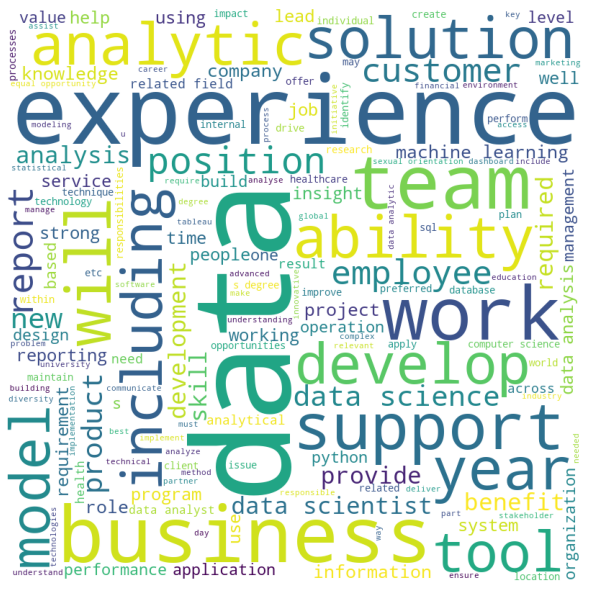

In [140]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)

for val in df_USA["description"][(df_USA["type"] == "data-scientist") | (df_USA["type"] == "data-analyst")]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
plt.savefig("website/wordcloud.png")

In [190]:
fig = go.Figure()
colors = ['#9b2226', '#ae2012', '#bb3e03',"#ca6702","#ee9b00","#e9d8a6","#94d2bd","#0a9396","#005f73","#001219"]
for j,n in enumerate(classes):
    df_sub = df_USA[df_USA["type"] == n]
    df_sub = df_sub["company_name"].value_counts().head(10)
    if j == 0:
        vis = True
    else:
        vis = False
    fig.add_trace(go.Bar(x=df_sub.index, y =df_sub.values,
                         marker = dict(
                color = colors,
                line=dict(color='rgb(8,48,107)',width=1.5),
                    opacity = 0.6), visible=vis))

buttons = []
for j, n in enumerate(classes):
    vis = [False] * len(classes)
    vis[j] = True
    buttons.append(dict(label = n,
                 method = 'update',
                 args = [{'visible': vis},
                         {'title': "Number of "+n+" position posted on 04-14 in USA"}]))
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            # PLACEMENT AND META DATA FOR THE BUTTON
            direction="down",
            showactive=True,  # HIGHLIGHTS ACTIVE DROPDOWN ITEM OR ACTIVE BUTTON IF TRUE
            pad={"r": 10, "t": 10},  # PADDING
            x=1,  # POSITION
            y=1.2,
            xanchor="left",  # ANCHOR POINT
            yanchor="top",
        )
    ])
fig.update_layout(title="Number of big-data-and-cloud-computing positions posted on 04-14 in USA", xaxis_title="Company Name", yaxis_title="Number of Jobs")
fig.show()
fig.write_html("website/companys.html")

In [193]:
fig = go.Figure()
colors = ['#9b2226', '#ae2012', '#bb3e03',"#ca6702","#ee9b00","#e9d8a6","#94d2bd","#0a9396","#005f73","#001219"]
for j,n in enumerate(classes):
    df_sub = df_USA[df_USA["type"] == n]
    df_sub = df_sub["via"].value_counts().head(10)
    if j == 0:
        vis = True
    else:
        vis = False
    fig.add_trace(go.Bar(x=df_sub.index, y =df_sub.values,
                         marker = dict(
                color = colors,
                line=dict(color='rgb(8,48,107)',width=1.5),
                    opacity = 0.6), visible=vis))

buttons = []
for j, n in enumerate(classes):
    vis = [False] * len(classes)
    vis[j] = True
    buttons.append(dict(label = n,
                 method = 'update',
                 args = [{'visible': vis},
                         {'title': "Number of "+n+" position posted on 04-14 through each medium "}]))
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            # PLACEMENT AND META DATA FOR THE BUTTON
            direction="down",
            showactive=True,  # HIGHLIGHTS ACTIVE DROPDOWN ITEM OR ACTIVE BUTTON IF TRUE
            pad={"r": 10, "t": 10},  # PADDING
            x=1,  # POSITION
            y=1.2,
            xanchor="left",  # ANCHOR POINT
            yanchor="top",
        )
    ])
fig.update_layout(title="Number of big-data-and-cloud-computing positions posted on 04-14 through each medium", yaxis_title="Number of Jobs")
fig.show()
fig.write_html("website/via.html")